<a href="https://colab.research.google.com/github/Dhavalkumar510/Final_Year_Project_UH/blob/main/Final_Year_Project_UH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary Libraray Functions

In [36]:
pip install yfinance

In [37]:
import yfinance as yf
import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


In [38]:
# Define the stock ticker (Lloyds Banking Group PLC)
ticker = 'LLOY.L'

# Get today's date in dd-mm-yyyy format
today = datetime.today().strftime('%d-%m-%Y')

# Fetch historical data until today
yf_data = yf.download(ticker, start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

# Convert the index to dd-mm-yyyy format
yf_data.index = yf_data.index.strftime('%d-%m-%Y')

data = yf_data

# Display the DataFrame

print(pd.DataFrame(data.head(15)))

print(pd.DataFrame(data.tail(15)))

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker         LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L     LLOY.L
Date                                                                        
04-01-2010  36.779499  52.259998  52.259998  51.099998  51.400002  167623403
05-01-2010  38.025188  54.029999  54.759998  52.200001  52.500000  233026957
06-01-2010  38.419289  54.590000  55.230000  53.169998  55.000000  142079248
07-01-2010  40.066143  56.930000  57.070000  54.000000  54.860001  216171360
08-01-2010  40.045033  56.900002  57.520000  56.160000  56.990002  178033888
11-01-2010  39.503120  56.130001  57.950001  55.630001  57.799999  169834032
12-01-2010  39.390514  55.970001  56.290001  55.080002  55.590000  189050155
13-01-2010  39.411629  56.000000  56.200001  55.160000  55.639999  117598072
14-01-2010  40.467297  57.500000  58.000000  56.580002  57.000000  225878876
15-01-2010  39.960571  56.779999  58.509998  56.599998  57.709999  241352597

In [39]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
Price      Ticker
Adj Close  LLOY.L    0
Close      LLOY.L    0
High       LLOY.L    0
Low        LLOY.L    0
Open       LLOY.L    0
Volume     LLOY.L    0
dtype: int64


In [40]:
# Save data to a CSV file
data.to_csv("Lloyds_Bank_Data.csv")

# Opening Price

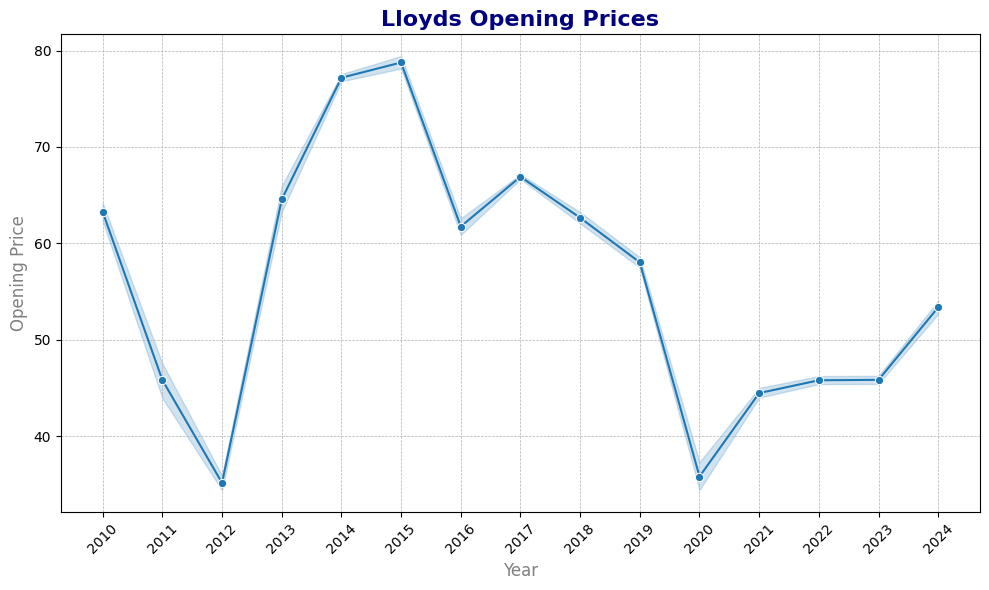

In [41]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Open'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)

plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Closing Price

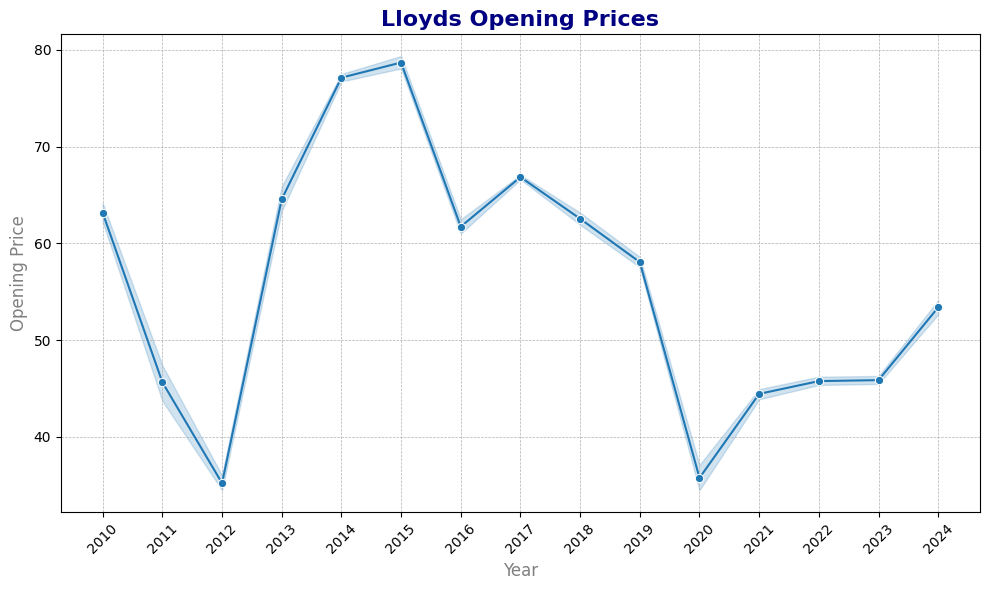

In [42]:
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
years = data.index.year

# Plot Opening Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=data['Close'].values.ravel(), color='#1f77b4', marker='o')
plt.title('Lloyds Opening Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Year', fontsize=12, color='gray')
plt.ylabel('Opening Price', fontsize=12, color='gray')

# Set x-ticks to show unique years
plt.xticks(ticks=range(years.min(), years.max() + 1), rotation=45)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

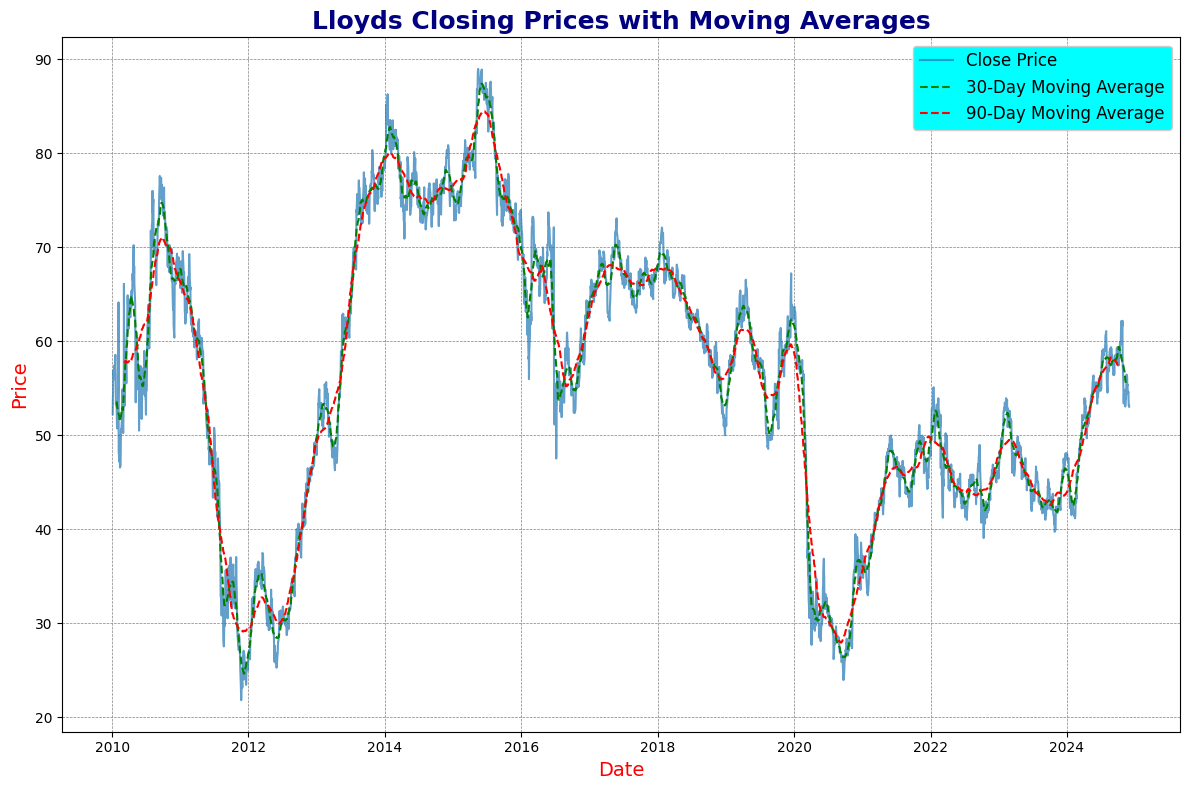

In [43]:
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Calculate Moving Averages
data['MA_30'] = data['Close'].rolling(window=30, center=True).mean()  # 30-day moving average
data['MA_90'] = data['Close'].rolling(window=90, center=True).mean()  # 90-day moving average

# Plot Close Prices with Moving Averages
plt.figure(figsize=(12, 8))
# Plot the data
plt.plot(data.index, data['Close'], label='Close Price', color='#1f77b4', alpha=0.7, linewidth=1.5)  # Blue for close price
plt.plot(data.index, data['MA_30'], label='30-Day Moving Average', color='green', linestyle='--', linewidth=1.5)  # Orange for MA_30
plt.plot(data.index, data['MA_90'], label='90-Day Moving Average', color='red', linestyle='--', linewidth=1.5)  # Green for MA_90

# Add labels and title
plt.title('Lloyds Closing Prices with Moving Averages', fontsize=18, color='navy', weight='bold')
plt.xlabel('Date', fontsize=14, color='Red')
plt.ylabel('Price', fontsize=14, color='Red')

# Add a legend with a colored box
legend = plt.legend(frameon=True, loc='upper right', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('cyan')
frame.set_alpha(1)
# Add grid
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# LSTM Model

In [44]:
# Scale the Close Prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare data for LSTM
def create_lstm_dataset(dataset, time_step=15):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Define time step for sequence
time_step = 15
X, y = create_lstm_dataset(scaled_data, time_step)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True, input_shape=(time_step, 1))),
    Dropout(0.3),
    BatchNormalization(),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu', kernel_regularizer='l2'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.build(input_shape=(None, time_step, 1))

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='lstm_architecture.png')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.2971
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1221
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0512
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0224
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0019
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016
Epoch 16/20
9

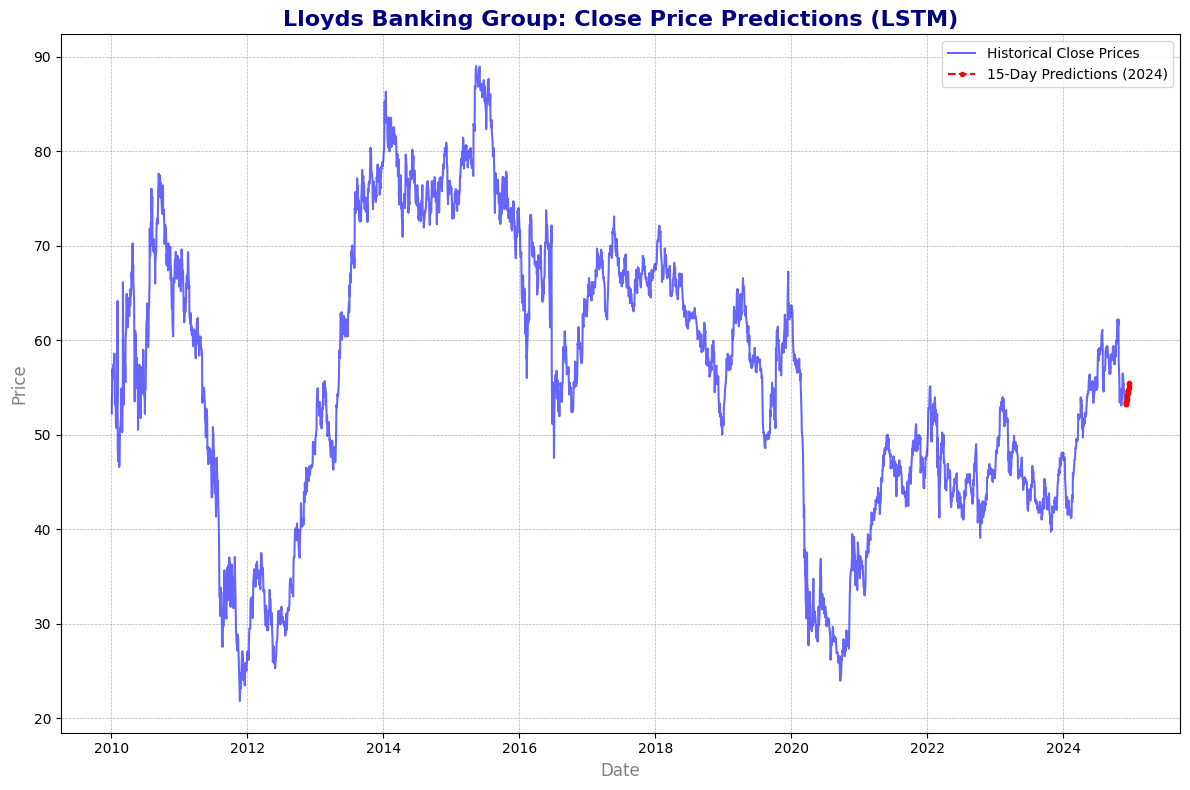

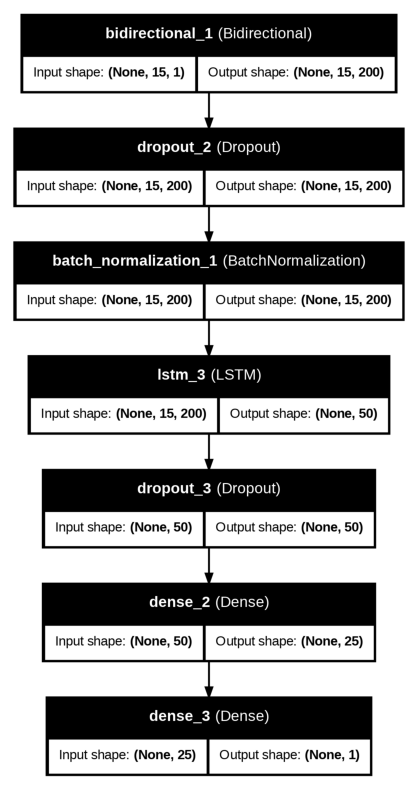

         Date  Predicted Close
0  2024-12-02        53.271503
1  2024-12-03        53.297134
2  2024-12-04        53.384342
3  2024-12-05        53.509472
4  2024-12-06        53.660877
5  2024-12-09        53.827560
6  2024-12-10        54.005943
7  2024-12-11        54.193005
8  2024-12-12        54.383461
9  2024-12-13        54.575333
10 2024-12-16        54.767097
11 2024-12-17        54.955719
12 2024-12-18        55.142776
13 2024-12-19        55.326508
14 2024-12-20        55.505901


In [45]:
# Predict future values for the next 15 business days using the most recent sequence
last_sequence = scaled_data[-time_step:]
future_predictions = []

for _ in range(15):
    prediction = model.predict(last_sequence.reshape(1, time_step, 1), verbose=0)
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse scale the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates starting from the last available date
future_dates = pd.date_range(start=data.index[-1], periods=16, freq='B')[1:]  # Exclude the last date

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions.ravel()})

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Close Price Predictions (LSTM)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the LSTM model architecture image
img = mpimg.imread('lstm_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print predicted values
print(future_df)


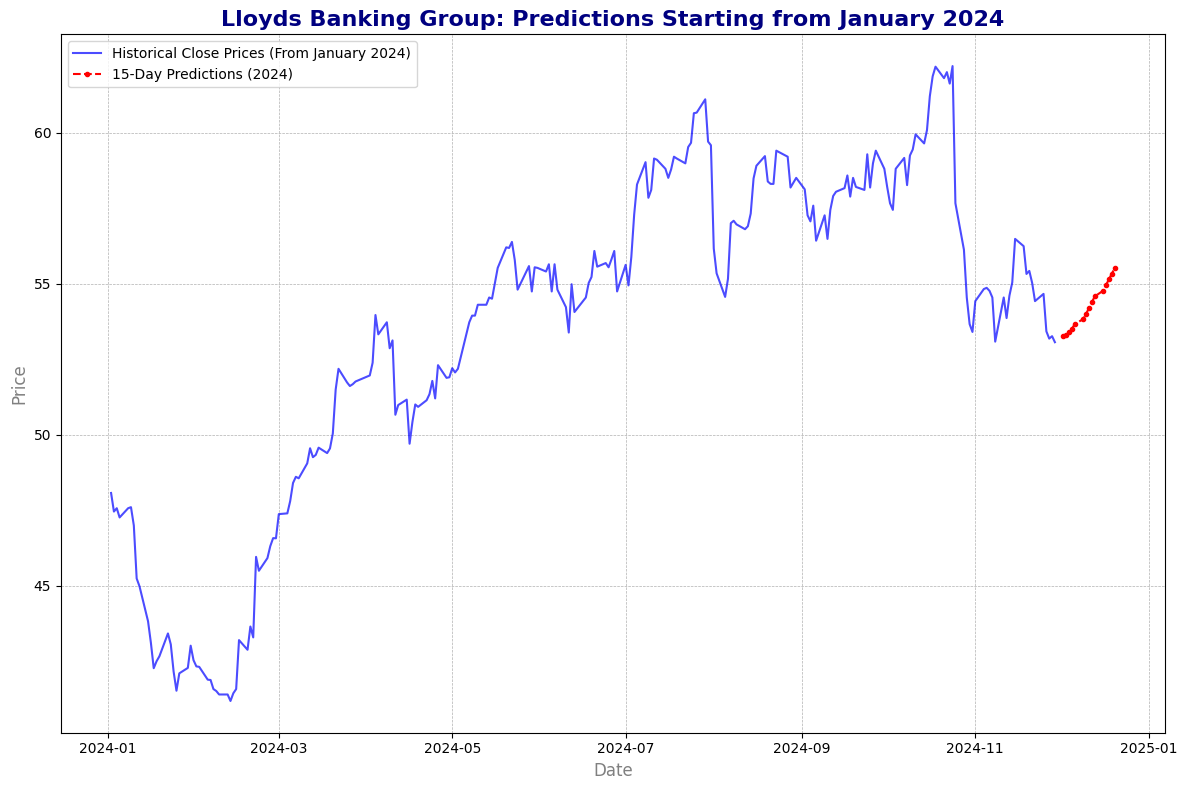

In [46]:
# Convert the index to datetime format (if not already done)
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

# Filter data starting from January 1, 2024
filtered_data = data[data.index >= '2024-01-01']

# Plot the subset data with predictions
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From January 2024)', color='blue', alpha=0.7)
plt.plot(future_df['Date'], future_df['Predicted Close'], label='15-Day Predictions (2024)', color='red', linestyle='--', marker='.')
plt.title('Lloyds Banking Group: Predictions Starting from January 2024', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Evaluation Metrics:
Mean Squared Error (MSE): 1.2115
Root Mean Squared Error (RMSE): 1.1007
Mean Absolute Error (MAE): 0.8251
R-squared (R²): 0.9588


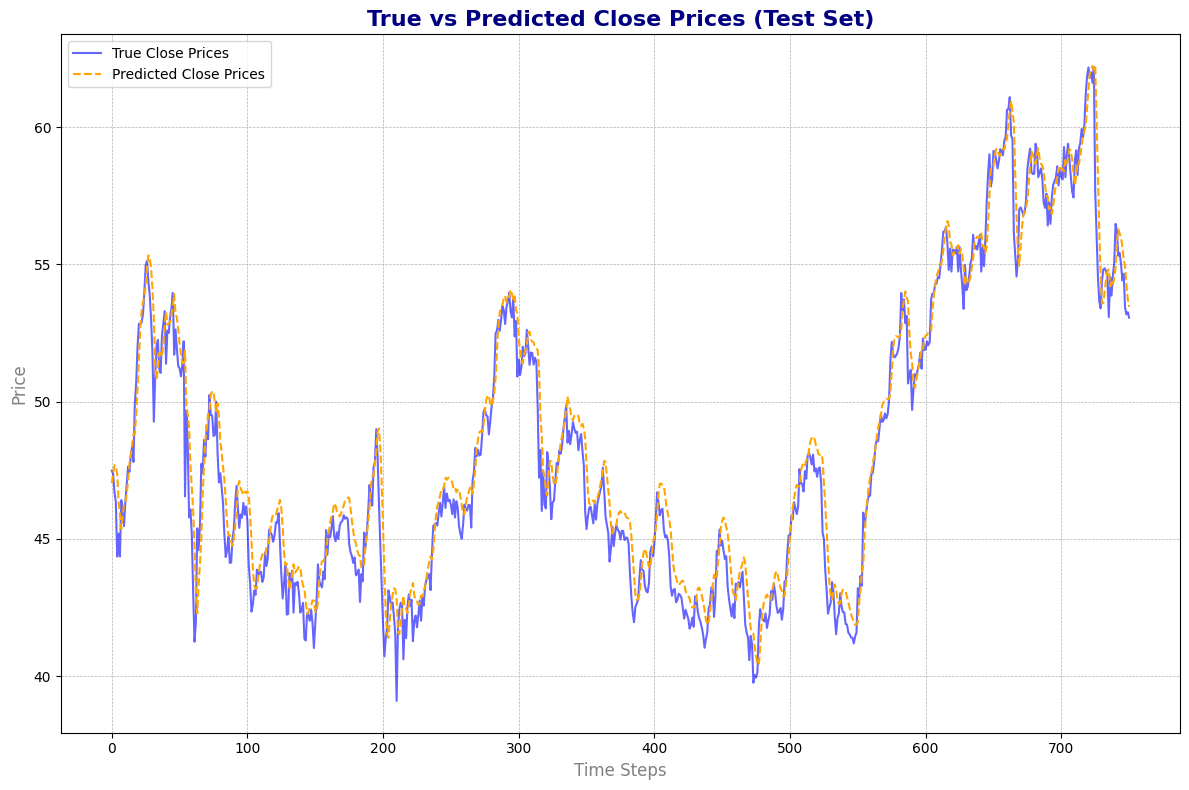

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot true vs predicted prices for the test set
plt.figure(figsize=(12, 8))
plt.plot(y_test_original, label='True Close Prices', color='blue', alpha=0.6)
plt.plot(y_pred_original, label='Predicted Close Prices', color='orange', linestyle='--')
plt.title('True vs Predicted Close Prices (Test Set)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Time Steps', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#ARIMA Model

In [17]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.3 MB/s eta 0:00:00


ADF Statistic: -2.1201785953684986
p-value: 0.23647847519435272
Series is NOT Stationary

ADF Statistic: -2.2337010889096836
p-value: 0.19424200647681272
Series is NOT Stationary

ADF Statistic: -12.837903089051041
p-value: 5.688572755429969e-24
Series is Stationary



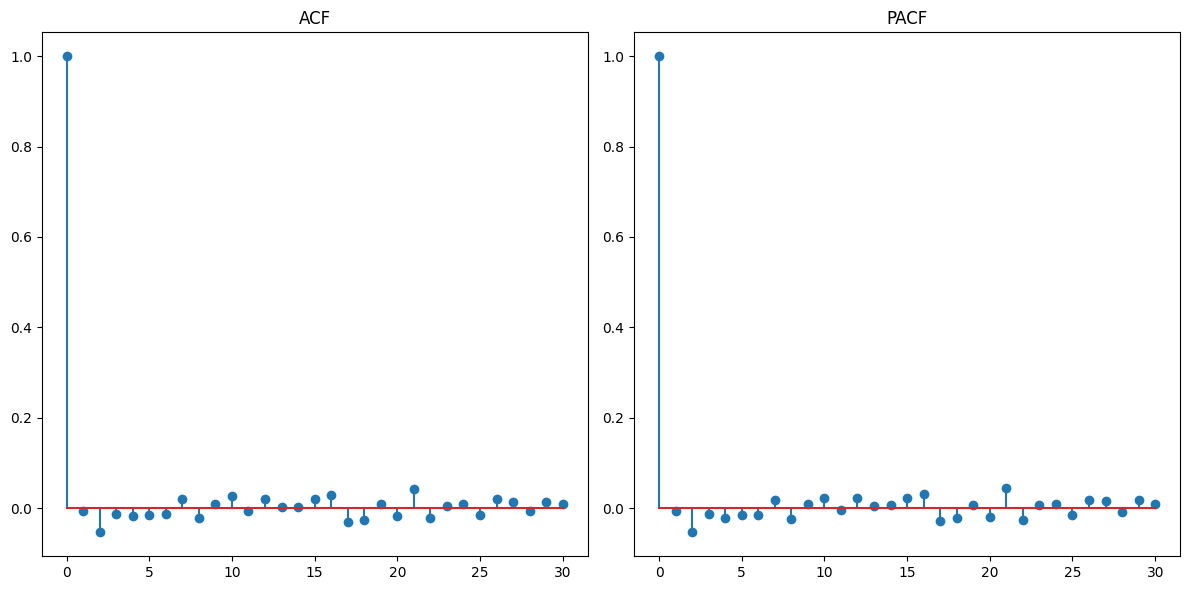

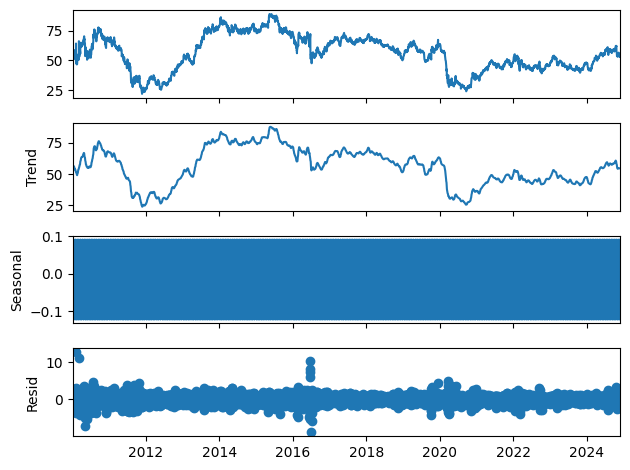

Searching for best ARIMA/SARIMA parameters...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 0, 0, 12) - AIC: 11666.425317695568


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 0, 1, 12) - AIC: 11569.21595502842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 1, 0, 12) - AIC: 13142.976063554961


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(0, 1, 1, 12) - AIC: 11531.71420855719


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 0, 0, 12) - AIC: 11617.312309666637


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 0, 1, 12) - AIC: 11542.724851594558


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 1, 0, 12) - AIC: 12401.049699062925


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 9)x(1, 1, 1, 12) - AIC: 11548.95452633284


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 0, 0, 12) - AIC: 11586.483391988297


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 0, 1, 12) - AIC: 11455.094300384746


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 1, 0, 12) - AIC: 12543.461381925565


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(0, 1, 1, 12) - AIC: 11503.513531013194


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 0, 0, 12) - AIC: 11463.690919735323


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 0, 1, 12) - AIC: 11435.511679473955


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 1, 0, 12) - AIC: 11977.502832869406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 1, 9)x(1, 1, 1, 12) - AIC: 11565.44239239585


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(0, 0, 0, 12) - AIC: 11610.357682169071


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(0, 0, 1, 12) - AIC: 11480.406696189279


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(0, 1, 0, 12) - AIC: 13236.910429802472


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(0, 1, 1, 12) - AIC: 11506.712817598682


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(1, 0, 0, 12) - AIC: 11518.426747775135


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(1, 0, 1, 12) - AIC: 11457.343305426828


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(1, 1, 0, 12) - AIC: 12640.914014392209


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 2, 9)x(1, 1, 1, 12) - AIC: 11532.211401505461

Best ARIMA/SARIMA Model Found:
Order: (9, 1, 9), Seasonal Order: (1, 0, 1, 12) with AIC: 11435.511679473955


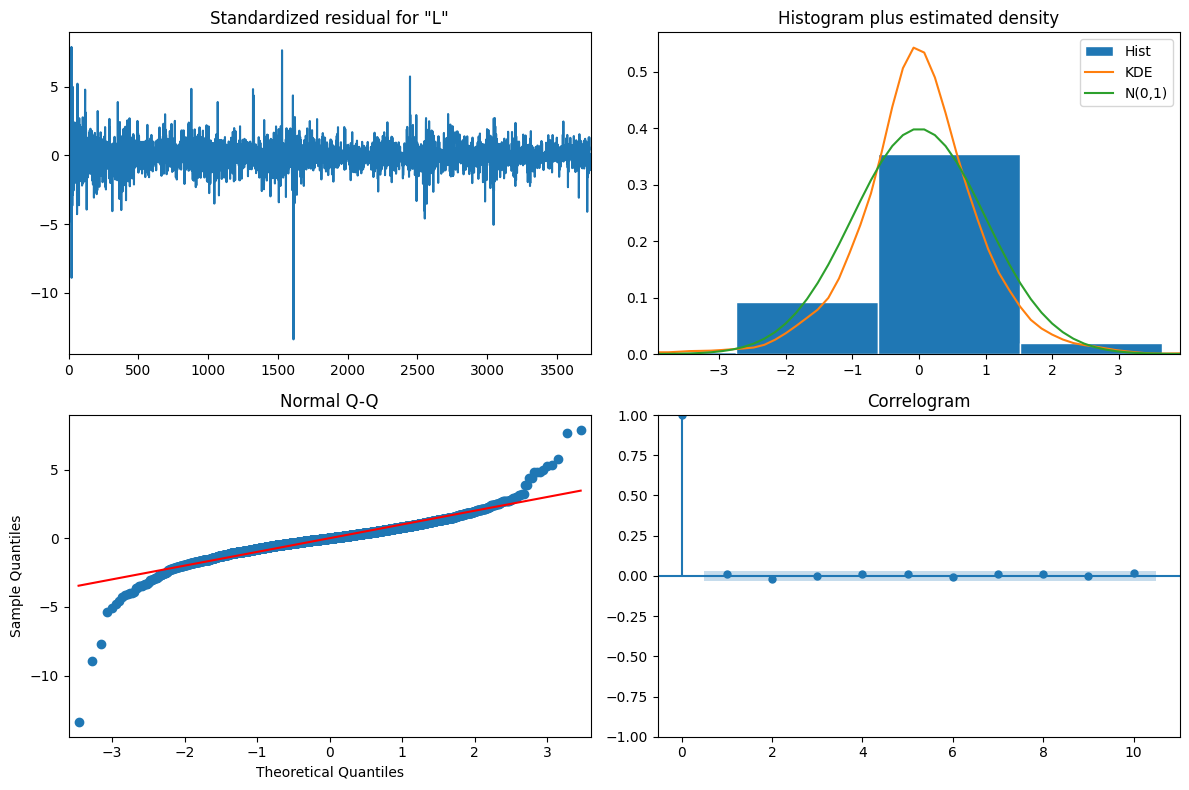

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


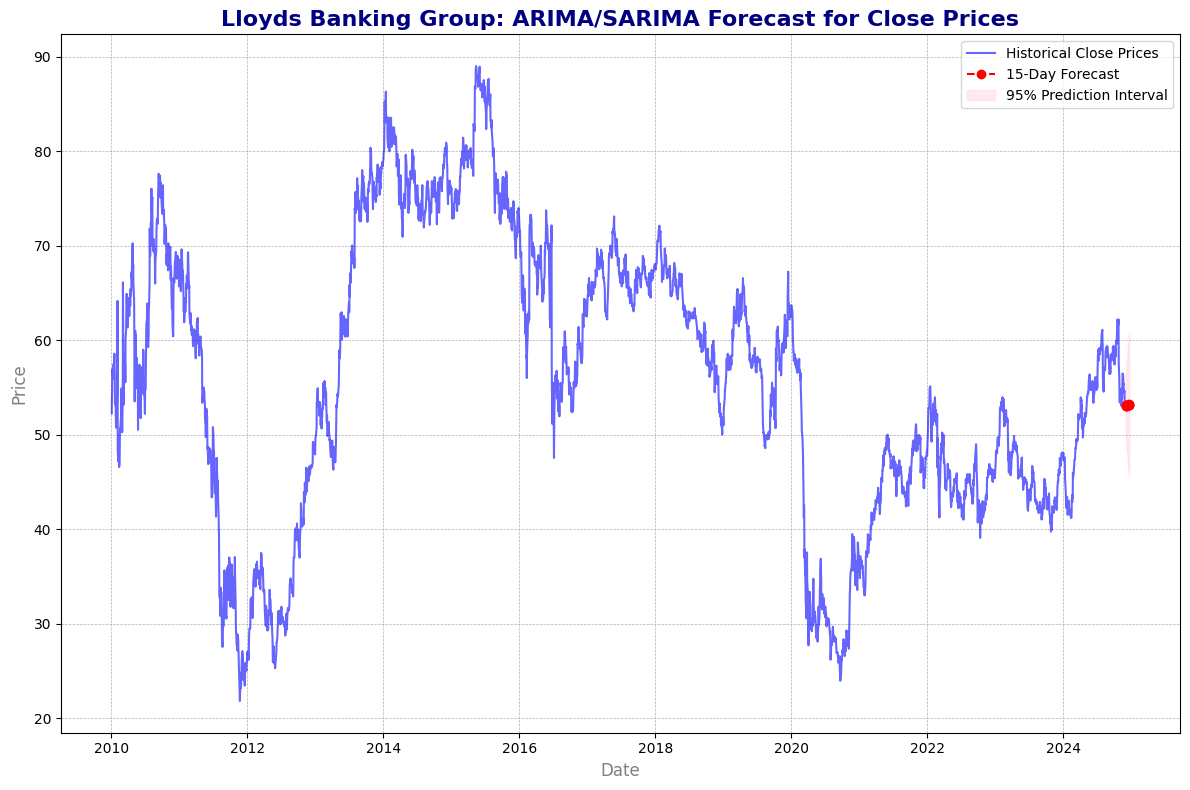

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3766 2024-12-02         53.035076    50.864741    55.205412
3767 2024-12-03         53.189918    50.153521    56.226315
3768 2024-12-04         53.117718    49.466709    56.768727
3769 2024-12-05         53.074683    48.902464    57.246902
3770 2024-12-06         53.092211    48.488135    57.696288
3771 2024-12-09         53.182756    48.186200    58.179313
3772 2024-12-10         53.166063    47.809994    58.522131
3773 2024-12-11         53.146787    47.447848    58.845727
3774 2024-12-12         53.153535    47.144299    59.162771
3775 2024-12-13         53.098118    46.807237    59.389000
3776 2024-12-16         53.171965    46.598297    59.745634
3777 2024-12-17         53.132752    46.285014    59.980490
3778 2024-12-18         53.123935    46.004525    60.243344
3779 2024-12-19         53.100003    45.730885    60.469122
3780 2024-12-20         53.216439    45.602823

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools

# Extract Close prices for modeling
close_prices = data['Close']

# Step 1: Test Stationarity
def test_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is NOT Stationary")
    print()

# Test stationarity of raw data
test_stationarity(close_prices)

# Log transform if non-stationary
log_transformed = np.log(close_prices + 1)
test_stationarity(log_transformed)

# Differencing if still non-stationary
diff_series = log_transformed.diff().dropna()
test_stationarity(diff_series)

# Step 2: Plot ACF and PACF for parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("ACF")
plt.stem(acf(diff_series, nlags=30))
plt.subplot(122)
plt.title("PACF")
plt.stem(pacf(diff_series, nlags=30))
plt.tight_layout()
plt.show()

# Step 3: Decompose the series (optional, to detect seasonality)
decomposition = seasonal_decompose(close_prices, model='additive', period=12)
decomposition.plot()
plt.show()

# Step 4: Grid Search for ARIMA/SARIMA Parameters
p = q = range(9, 10)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(range(0, 2), range(0, 2), range(0, 2))]

min_aic = float('inf')
best_order = None
best_seasonal_order = None
best_model = None

print("Searching for best ARIMA/SARIMA parameters...")
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(close_prices, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param
                best_model = results
            print(f"ARIMA{param}x{seasonal_param} - AIC: {results.aic}")
        except Exception as e:
            continue

print("\nBest ARIMA/SARIMA Model Found:")
print(f"Order: {best_order}, Seasonal Order: {best_seasonal_order} with AIC: {min_aic}")

# Step 5: Residual Diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Step 6: Forecasting
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
future_dates = pd.date_range(start=close_prices.index[-1], periods=16, freq='B')[1:]  # 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Step 7: Plot the Historical Data and Forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA/SARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Step 8: Model Evaluation
y_true = close_prices[-15:]
y_forecasted = best_model.predict(start=len(close_prices) - 15, end=len(close_prices) - 1)

mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_forecasted)
r2 = r2_score(y_true, y_forecasted)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


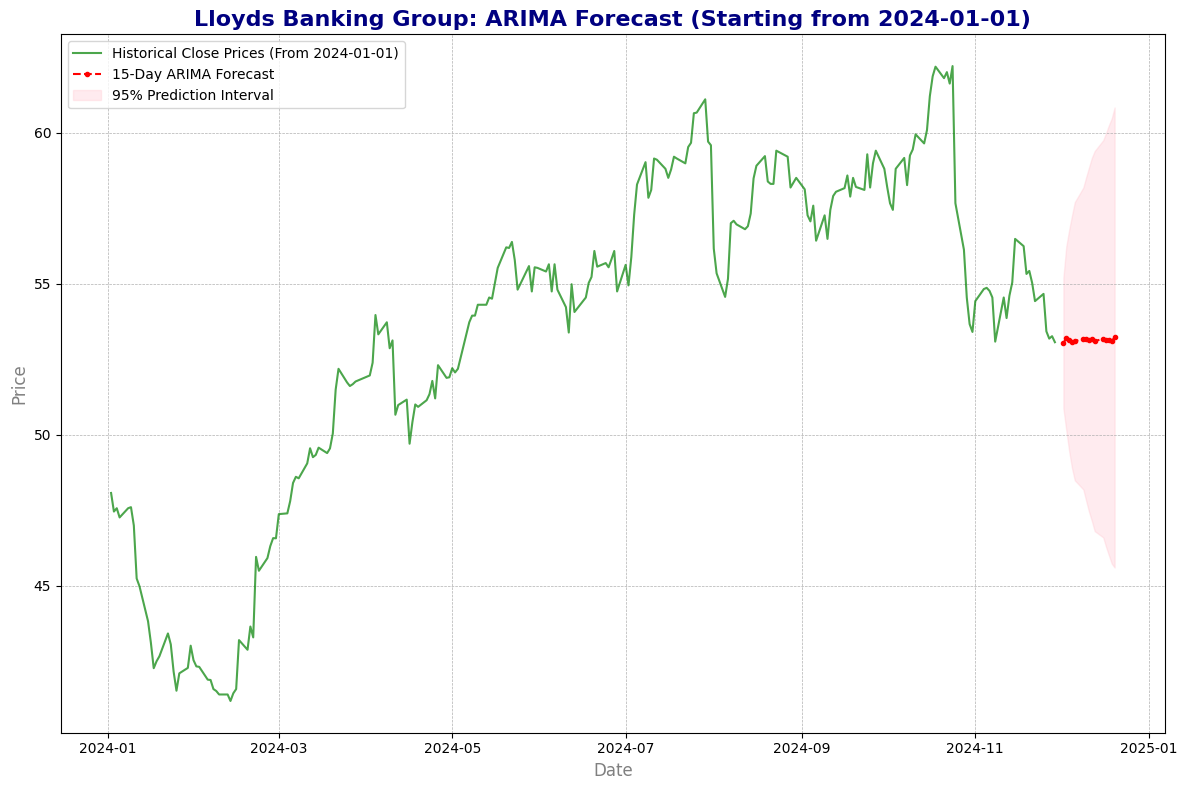

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3766 2024-12-02         53.035076    50.864741    55.205412
3767 2024-12-03         53.189918    50.153521    56.226315
3768 2024-12-04         53.117718    49.466709    56.768727
3769 2024-12-05         53.074683    48.902464    57.246902
3770 2024-12-06         53.092211    48.488135    57.696288
3771 2024-12-09         53.182756    48.186200    58.179313
3772 2024-12-10         53.166063    47.809994    58.522131
3773 2024-12-11         53.146787    47.447848    58.845727
3774 2024-12-12         53.153535    47.144299    59.162771
3775 2024-12-13         53.098118    46.807237    59.389000
3776 2024-12-16         53.171965    46.598297    59.745634
3777 2024-12-17         53.132752    46.285014    59.980490
3778 2024-12-18         53.123935    46.004525    60.243344
3779 2024-12-19         53.100003    45.730885    60.469122
3780 2024-12-20         53.216439    45.602823

In [75]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


In [71]:
# Making a datacopy which can be used to bulid a model

data1 =data.copy()

# Extract the 'Close' prices for time series analysis
close_prices = data1['Close']

# Define the range of (p, d, q) parameters for ARIMA
p = q = range(0, 10)  # You can expand the range for a more exhaustive search
d = range(0, 3)  # Typically, d is small
pdq = list(itertools.product(p, d, q))

# Initialize variables to store the best model
min_aic = float('inf')
best_order = None
best_model = None

# Grid search for the best ARIMA parameters
print("Searching for the best ARIMA parameters...")
for param in pdq:
    try:
        # Fit the model
        model = SARIMAX(close_prices, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)

        # Check the AIC value
        if results.aic < min_aic:
            min_aic = results.aic
            best_order = param
            best_model = results

        # Print progress
        print(f"ARIMA{param} - AIC: {results.aic}")
    except Exception as e:
        print(f"ARIMA{param} failed. Error: {e}")
        continue

print("\nBest ARIMA Model Found:")
print(f"Order: {best_order} with AIC: {min_aic}")

# Model diagnostics
best_model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()


Searching for the best ARIMA parameters...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


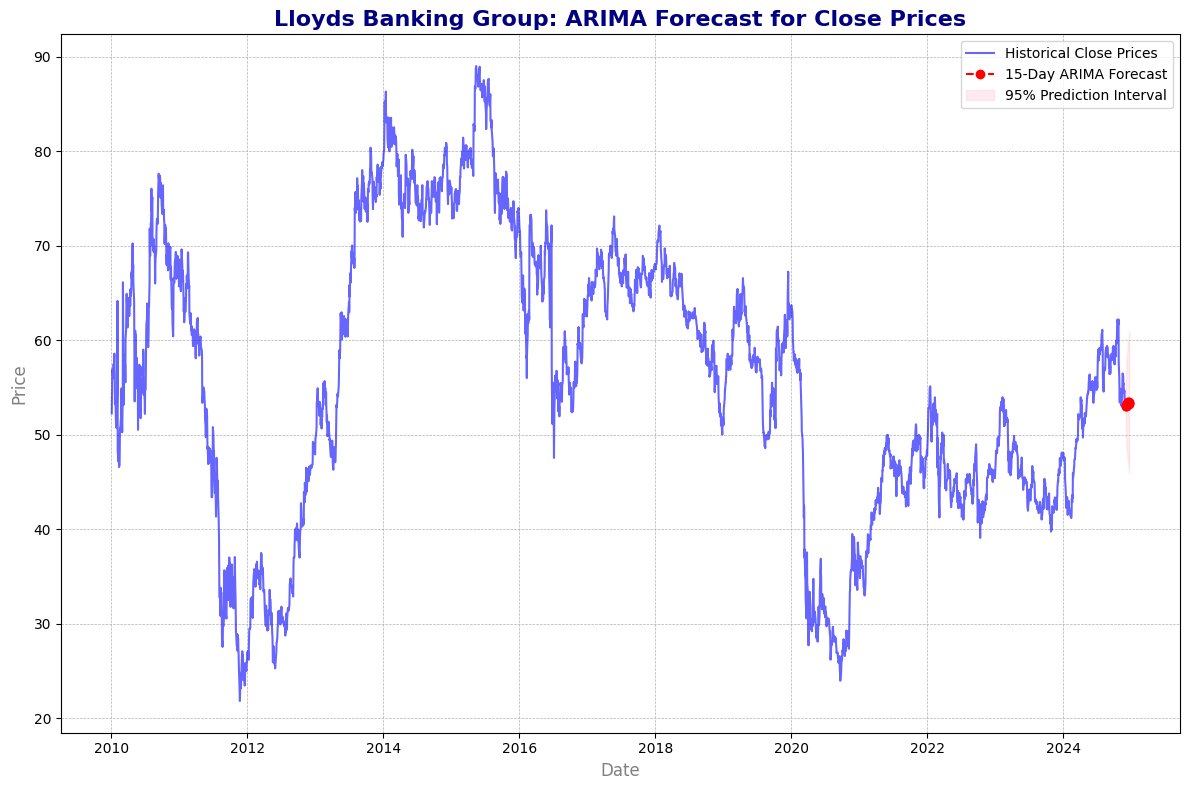

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3766 2024-12-02         53.026240    50.937380    55.115100
3767 2024-12-03         53.144145    50.169599    56.118690
3768 2024-12-04         53.080216    49.505386    56.655045
3769 2024-12-05         53.046703    48.954536    57.138871
3770 2024-12-06         53.160032    48.626439    57.693626
3771 2024-12-09         53.318803    48.402234    58.235373
3772 2024-12-10         53.285716    48.004425    58.567008
3773 2024-12-11         53.222829    47.599955    58.845703
3774 2024-12-12         53.364404    47.418803    59.310005
3775 2024-12-13         53.483221    47.244753    59.721689
3776 2024-12-16         53.493311    46.969619    60.017004
3777 2024-12-17         53.360818    46.574971    60.146665
3778 2024-12-18         53.272106    46.228873    60.315339
3779 2024-12-19         53.359614    46.073364    60.645865
3780 2024-12-20         53.455136    45.938541

In [69]:

# Forecast for the next 15 business days
forecast = best_model.get_forecast(steps=15)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Generate future dates
start_date = close_prices.index[-1]  # Last date of the historical data
future_dates = pd.date_range(start=start_date, periods=16, freq='B')[1:]  # Generate 15 business days

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Close': forecast_values,
    'Lower Bound': forecast_conf_int.iloc[:, 0],
    'Upper Bound': forecast_conf_int.iloc[:, 1]
})

# Plot the historical data and the forecast
plt.figure(figsize=(12, 8))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='o')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast for Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)

# Calculate RMSE
y_true = close_prices[-15:]  # Adjust if validation set is used
y_forecasted = forecast.predicted_mean[:len(y_true)]  # Limit predictions to historical overlap
mse = mean_squared_error(y_true, y_forecasted)
rmse = np.sqrt(mse)
print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



mae = mean_absolute_error(y_true, y_forecasted)
r2 = r2_score(y_true, y_forecasted)

# Print the evaluation metrics
print("Test Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


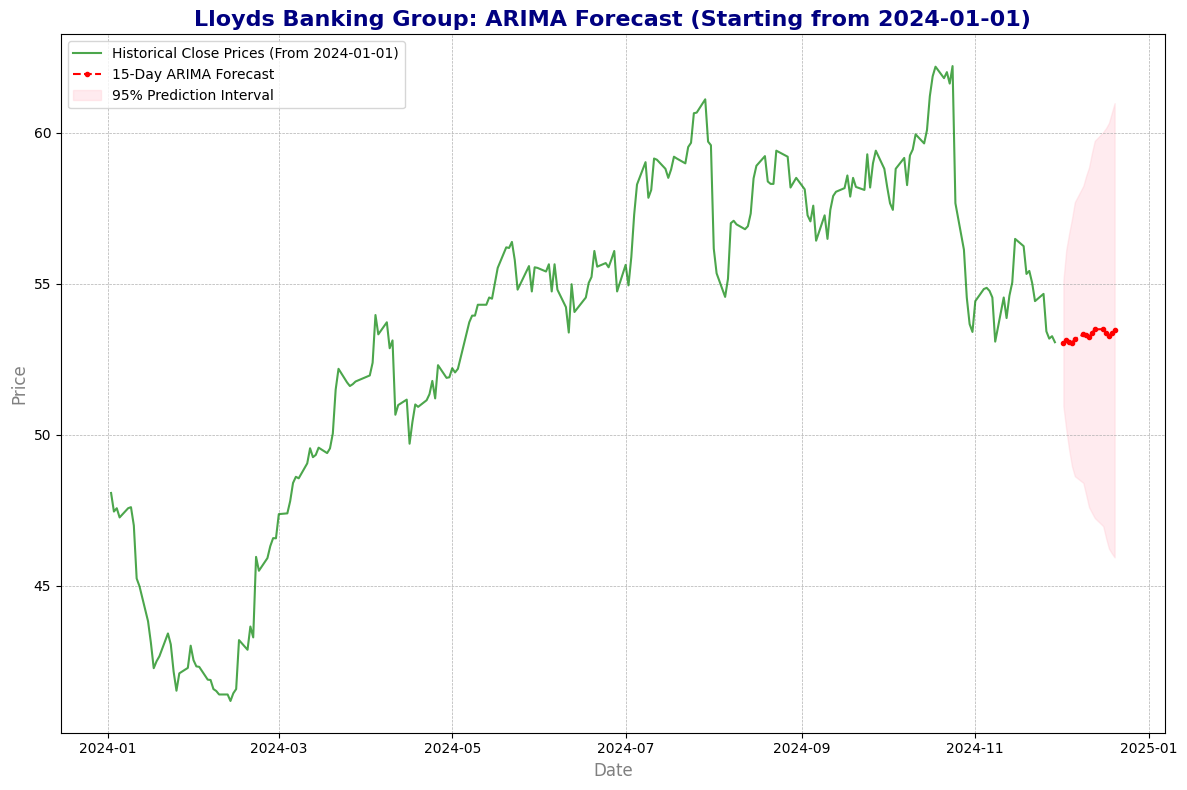

Forecasted Close Prices for the Next 15 Days of 2024:
           Date  Forecasted Close  Lower Bound  Upper Bound
3766 2024-12-02         53.026240    50.937380    55.115100
3767 2024-12-03         53.144145    50.169599    56.118690
3768 2024-12-04         53.080216    49.505386    56.655045
3769 2024-12-05         53.046703    48.954536    57.138871
3770 2024-12-06         53.160032    48.626439    57.693626
3771 2024-12-09         53.318803    48.402234    58.235373
3772 2024-12-10         53.285716    48.004425    58.567008
3773 2024-12-11         53.222829    47.599955    58.845703
3774 2024-12-12         53.364404    47.418803    59.310005
3775 2024-12-13         53.483221    47.244753    59.721689
3776 2024-12-16         53.493311    46.969619    60.017004
3777 2024-12-17         53.360818    46.574971    60.146665
3778 2024-12-18         53.272106    46.228873    60.315339
3779 2024-12-19         53.359614    46.073364    60.645865
3780 2024-12-20         53.455136    45.938541

In [70]:
# Filter historical data from 2024-01-01 onward
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')  # Ensure the index is datetime
filtered_data = data[data.index >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data.index, filtered_data['Close'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day ARIMA Forecast', color='red', linestyle='--', marker='.')
plt.fill_between(forecast_df['Date'], forecast_df['Lower Bound'], forecast_df['Upper Bound'], color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: ARIMA Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Days of 2024:")
print(forecast_df)


# Prophet

In [21]:
data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,MA_30,MA_90
Ticker,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,,
Date,,,,,,,,
2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403,NaN,NaN
2010-01-05,38.025188,54.029999,54.759998,52.200001,52.500000,233026957,NaN,NaN
2010-01-06,38.419289,54.590000,55.230000,53.169998,55.000000,142079248,NaN,NaN
2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360,NaN,NaN
2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888,NaN,NaN
2010-01-11,39.503120,56.130001,57.950001,55.630001,57.799999,169834032,NaN,NaN
2010-01-12,39.390514,55.970001,56.290001,55.080002,55.590000,189050155,NaN,NaN
2010-01-13,39.411629,56.000000,56.200001,55.160000,55.639999,117598072,NaN,NaN


In [22]:
# If 'Date' is the index, reset it to make it a regular column
if 'Date' not in data.columns:
    data.reset_index(inplace=True)

# Select only 'Date' and 'Close' columns
data_for_prophet = data[['Date', 'Close']].copy()

# Rename the columns for Prophet
data_for_prophet.columns = ['ds', 'y']

# Drop rows with NaN values (if any)
data_for_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Ensure 'y' is numeric
data_for_prophet['y'] = pd.to_numeric(data_for_prophet['y'], errors='coerce')
data_for_prophet.dropna(subset=['y'], inplace=True)  # Drop rows where 'y' is still NaN

# Convert 'ds' column to datetime with the correct format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'], format='%d-%m-%Y')

# Display the prepared data
print(data_for_prophet.head(10))

          ds          y
0 2010-01-04  52.259998
1 2010-01-05  54.029999
2 2010-01-06  54.590000
3 2010-01-07  56.930000
4 2010-01-08  56.900002
5 2010-01-11  56.130001
6 2010-01-12  55.970001
7 2010-01-13  56.000000
8 2010-01-14  57.500000
9 2010-01-15  56.779999


In [23]:
# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(data_for_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_1xzroc/4k0bnsqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_1xzroc/nuzmux9h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44102', 'data', 'file=/tmp/tmpo_1xzroc/4k0bnsqj.json', 'init=/tmp/tmpo_1xzroc/nuzmux9h.json', 'output', 'file=/tmp/tmpo_1xzroc/prophet_modelyu2fm0w4/prophet_model-20241201205350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:53:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Forecast for the next 15 business days
future = prophet_model.make_future_dataframe(periods=15, freq='B')  # Business days
forecast = prophet_model.predict(future)

# Extract the forecasted values
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Filter future predictions (next 15 days)
future_predictions = forecasted_values[forecasted_values['ds'] > data_for_prophet['ds'].max()]

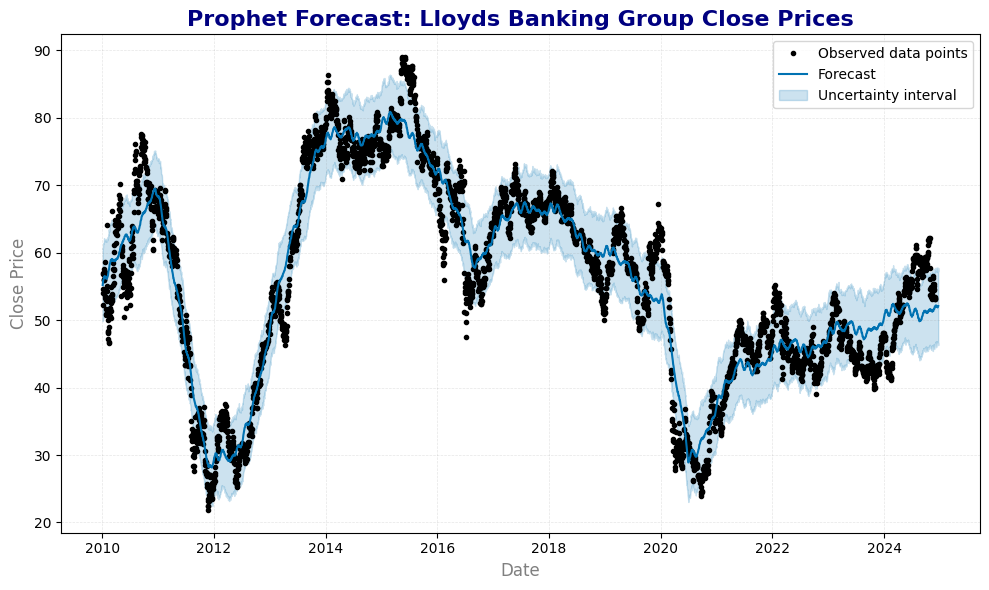

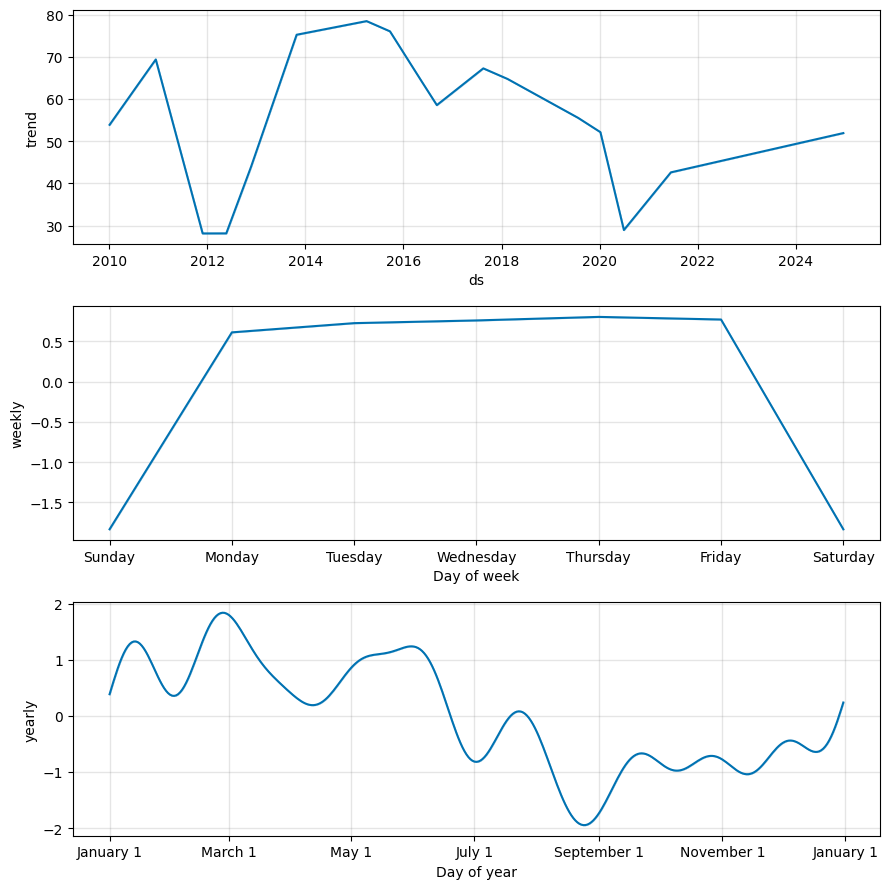

In [25]:
# Plot historical data and forecast
prophet_model.plot(forecast)
plt.title('Prophet Forecast: Lloyds Banking Group Close Prices', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend()
plt.show()

# Component plots
prophet_model.plot_components(forecast)
plt.tight_layout()
plt.show()

RMSE: 4.3043
MSE: 18.5267
MAE: 3.3561


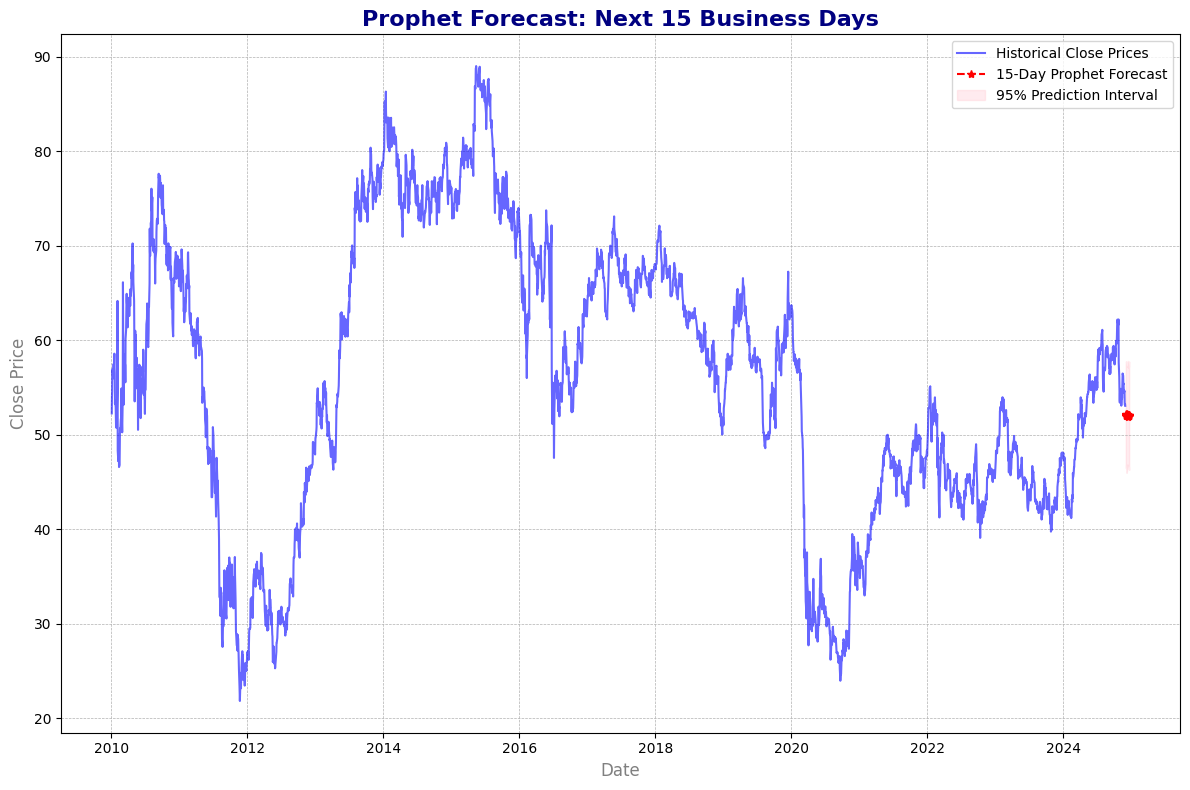

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3766 2024-12-02  51.952272   46.593173   57.453711
3767 2024-12-03  52.086042   46.451973   57.771480
3768 2024-12-04  52.132625   46.842659   57.661861
3769 2024-12-05  52.183440   46.510314   57.405970
3770 2024-12-06  52.151925   45.972430   57.257749
3771 2024-12-09  51.966331   46.220661   57.403979
3772 2024-12-10  52.065579   46.431205   57.170646
3773 2024-12-11  52.082360   46.863083   57.399564
3774 2024-12-12  52.109253   46.692507   57.683855
3775 2024-12-13  52.060729   46.668651   57.810130
3776 2024-12-16  51.873348   46.424983   57.660792
3777 2024-12-17  51.989978   46.640842   57.059428
3778 2024-12-18  52.033335   46.700425   57.548446
3779 2024-12-19  52.095760   46.641193   57.175670
3780 2024-12-20  52.091235   46.285996   57.749790


In [26]:
# Filter historical predictions for RMSE/MSE/MAE calculation
historical_forecast = forecast[forecast['ds'] <= data_for_prophet['ds'].max()]

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(data_for_prophet['y'], historical_forecast['yhat']))
mse = mean_squared_error(data_for_prophet['y'], historical_forecast['yhat'])
mae = mean_absolute_error(data_for_prophet['y'], historical_forecast['yhat'])

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot future predictions only
plt.figure(figsize=(12, 8))
plt.plot(data_for_prophet['ds'], data_for_prophet['y'], label='Historical Close Prices', color='blue', alpha=0.6)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Prophet Forecast: Next 15 Business Days', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values for the next 15 days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


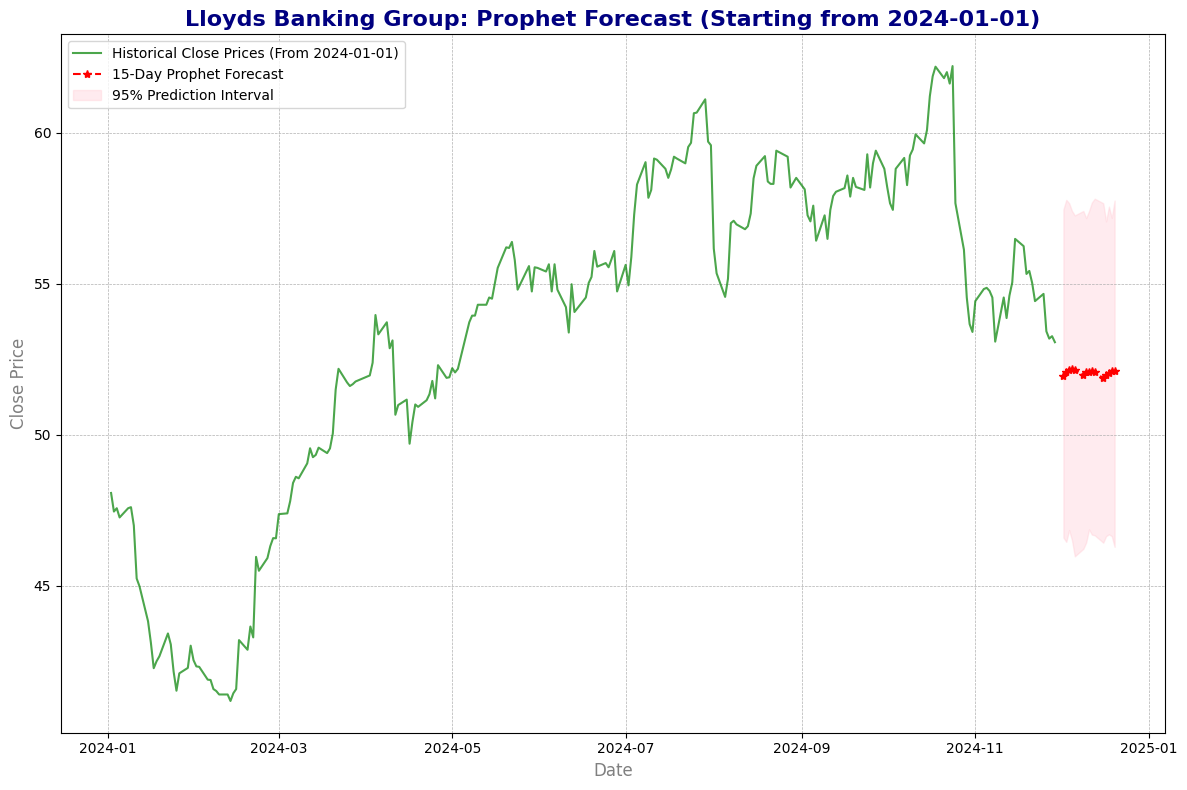

Forecasted Close Prices for the Next 15 Business Days:
             ds       yhat  yhat_lower  yhat_upper
3766 2024-12-02  51.952272   46.593173   57.453711
3767 2024-12-03  52.086042   46.451973   57.771480
3768 2024-12-04  52.132625   46.842659   57.661861
3769 2024-12-05  52.183440   46.510314   57.405970
3770 2024-12-06  52.151925   45.972430   57.257749
3771 2024-12-09  51.966331   46.220661   57.403979
3772 2024-12-10  52.065579   46.431205   57.170646
3773 2024-12-11  52.082360   46.863083   57.399564
3774 2024-12-12  52.109253   46.692507   57.683855
3775 2024-12-13  52.060729   46.668651   57.810130
3776 2024-12-16  51.873348   46.424983   57.660792
3777 2024-12-17  51.989978   46.640842   57.059428
3778 2024-12-18  52.033335   46.700425   57.548446
3779 2024-12-19  52.095760   46.641193   57.175670
3780 2024-12-20  52.091235   46.285996   57.749790


In [27]:
import matplotlib.pyplot as plt

# Ensure the 'ds' column is in datetime format
data_for_prophet['ds'] = pd.to_datetime(data_for_prophet['ds'])

# Filter the historical data from 2024-01-01 onward
filtered_data_prophet = data_for_prophet[data_for_prophet['ds'] >= '2024-01-01']

# Plot data from 2024-01-01 with forecast
plt.figure(figsize=(12, 8))
plt.plot(filtered_data_prophet['ds'], filtered_data_prophet['y'], label='Historical Close Prices (From 2024-01-01)', color='green', alpha=0.7)
plt.plot(future_predictions['ds'], future_predictions['yhat'], label='15-Day Prophet Forecast', color='red', linestyle='--', marker='*')
plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='95% Prediction Interval')
plt.title('Lloyds Banking Group: Prophet Forecast (Starting from 2024-01-01)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Close Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Display the forecasted values
print("Forecasted Close Prices for the Next 15 Business Days:")
print(future_predictions)


# HOLT - WINTERS Model

In [28]:
data.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_30,MA_90
Ticker,,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,LLOY.L,,
0,2010-01-04,36.779499,52.259998,52.259998,51.099998,51.400002,167623403,NaN,NaN
1,2010-01-05,38.025188,54.029999,54.759998,52.200001,52.500000,233026957,NaN,NaN
2,2010-01-06,38.419289,54.590000,55.230000,53.169998,55.000000,142079248,NaN,NaN
3,2010-01-07,40.066143,56.930000,57.070000,54.000000,54.860001,216171360,NaN,NaN
4,2010-01-08,40.045033,56.900002,57.520000,56.160000,56.990002,178033888,NaN,NaN
5,2010-01-11,39.503120,56.130001,57.950001,55.630001,57.799999,169834032,NaN,NaN
6,2010-01-12,39.390514,55.970001,56.290001,55.080002,55.590000,189050155,NaN,NaN
7,2010-01-13,39.411629,56.000000,56.200001,55.160000,55.639999,117598072,NaN,NaN
8,2010-01-14,40.467297,57.500000,58.000000,56.580002,57.000000,225878876,NaN,NaN


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

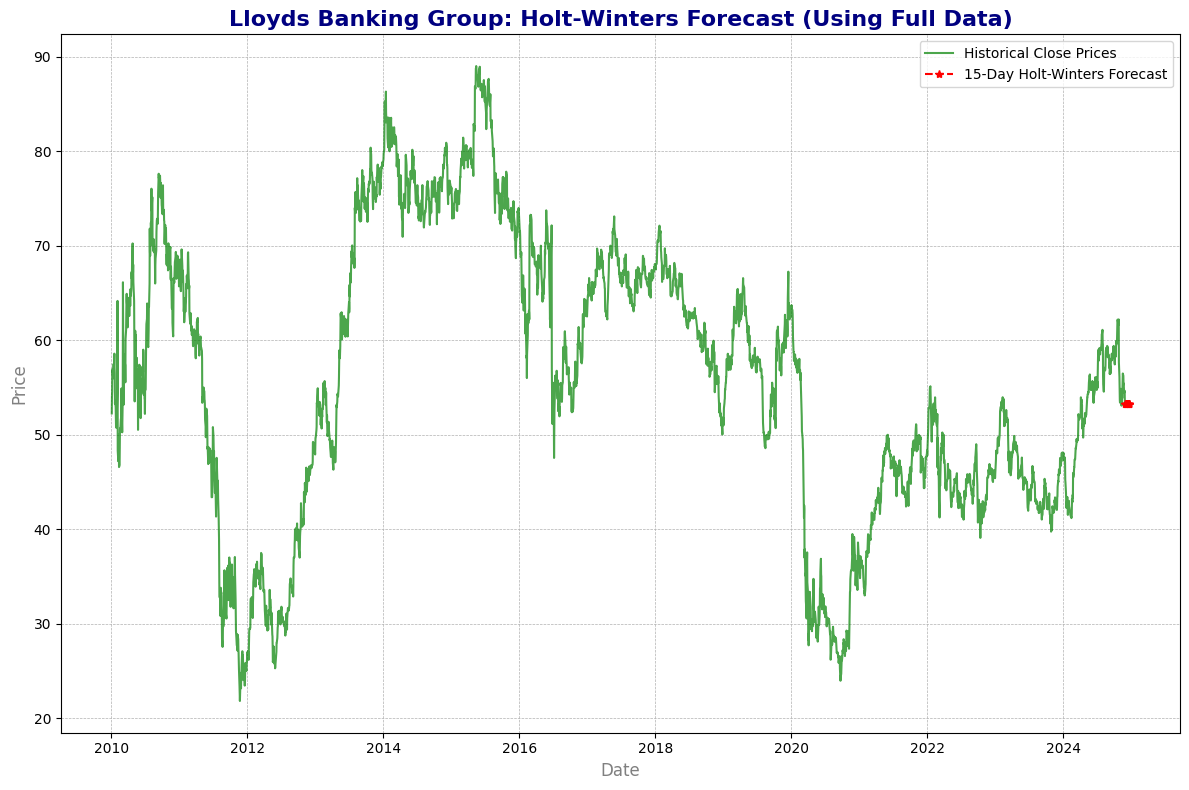

In [ ]:
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Use the full dataset and rename it to data_hw
data_hw = data.copy()

# Build the Holt-Winters Model using the full dataset
holt_winters_model = ExponentialSmoothing(data_hw['Close'],
                                          trend='add',   # Additive trend
                                          seasonal='add', # Additive seasonality
                                          seasonal_periods=5)  # Adjust seasonal_periods based on the data pattern
holt_winters_model_fit = holt_winters_model.fit()

# Forecast the next 15 business days
forecast_holt_winters = holt_winters_model_fit.forecast(steps=15)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data_hw['Date'].max(), periods=16, freq='B')[1:]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted Close': forecast_holt_winters
})

# Plot historical data and forecast
plt.figure(figsize=(12, 8))
plt.plot(data_hw['Date'], data_hw['Close'], label='Historical Close Prices', color='green', alpha=0.7)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Close'], label='15-Day Holt-Winters Forecast', color='red', linestyle='--', marker='*')
plt.title('Lloyds Banking Group: Holt-Winters Forecast (Using Full Data)', fontsize=16, color='navy', weight='bold')
plt.xlabel('Date', fontsize=12, color='gray')
plt.ylabel('Price', fontsize=12, color='gray')
plt.legend()
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate RMSE, MSE, and MAE for the forecast
historical_forecast = pd.DataFrame({
    'ds': data_hw['Date'].values,  # Convert to 1D array using .values
    'y_true': data_hw['Close'].values,  # Convert to 1D array using .values
    'yhat': holt_winters_model_fit.fittedvalues.values  # Convert to 1D array using .values
})

# Calculate RMSE, MSE, MAE
rmse_hw = np.sqrt(mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat']))
mse_hw = mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat'])
mae_hw = mean_absolute_error(historical_forecast['y_true'], historical_forecast['yhat'])

# Print performance metrics
print(f"RMSE: {rmse_hw:.4f}")
print(f"MSE: {mse_hw:.4f}")
print(f"MAE: {mae_hw:.4f}")

# Display forecasted values for the next 15 business days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(forecast_df)


ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
# Calculate RMSE, MSE, and MAE for the forecast
historical_forecast = pd.DataFrame({
    'ds': data_hw['Date'].values,  # Convert to 1D array using .values
    'y_true': data_hw['Close'].values,  # Convert to 1D array using .values
    'yhat': holt_winters_model_fit.fittedvalues # Remove .values to get the 1D Series
})

# Calculate RMSE, MSE, MAE
rmse_hw = np.sqrt(mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat']))
mse_hw = mean_squared_error(historical_forecast['y_true'], historical_forecast['yhat'])
mae_hw = mean_absolute_error(historical_forecast['y_true'], historical_forecast['yhat'])

# Print performance metrics
print(f"RMSE: {rmse_hw:.4f}")
print(f"MSE: {mse_hw:.4f}")
print(f"MAE: {mae_hw:.4f}")

# Display forecasted values for the next 15 business days
print("Forecasted Close Prices for the Next 15 Business Days:")
print(forecast_df)

ValueError: Per-column arrays must each be 1-dimensional